# Parte 1: 9:40-11:10

## Contenidos:
* Pasar lista
* Determinar patrones con posibles funciones biológicas
* Implementar función para countar subsecuencias dentro de otra secuencia.

# Introducción


Para ganar intuición, analizemos un problema fundamental de bioinformática: ¿en dónde está el origen de replicación del genoma bacteriano?

<img src="https://raw.githubusercontent.com/mrivas/Bioinformatica/master/naive_replication.png" alt="Drawing" style="width: 400px;"/>

[Imagen de https://www.bioinformaticsalgorithms.org/](https://www.bioinformaticsalgorithms.org/bioinformatics-chapter-1)

Hay una secuencia que es reconocida por la maquinaria transcripcional. Esa secuencia (puede haber más de una copia en el genoma) es donde comienza a replicarse el material genético.

Para encontrar tal secuencia, comenzemos por resolver problemas más simples que luego escalaremos para abarcar la complejidad del problema en cuestion. 

Dada una secuencia (genética, de texto, o lo que sea), empezemos por contar cuantas veces en ella está repetido un patrón. Por ejemplo, en la secuencia

```python
Secuencia="Hola, ¿como estas?. Hola, bien gracias. Y tú, ¿qué cuentas?"
```

1 ¿Cuántas vences aparece el patrón

```python
"Hola"?
```

2 ¿Cuántas vences aparece el patrón

```python
"as"?
```

Para esto puedes usar el siguiente seudocódigo:

```python
PatternCount(Text, Pattern)
    count ← 0
    for i ← 0 to |Text| − |Pattern|
        if Text(i, |Pattern|) = Pattern
            count ← count + 1
    return count
```

# Ejercicio1

1. Implementar la funcion ```PatterCount``` de acuerdo al seudocódigo anterior.
2. Usar ```PatterCount``` para determinar cuantas veces "CA" aparece en "ACAC".
2. Usar ```PatterCount``` para determinar cuantas veces "CATC" aparece en "ATCCATCGTATAGCGCATCCTGTAC".

In [30]:
# Ejercicio 1
def PatternCount(Text, Pattern): 
    count = 0
    x = len(Text) - len(Pattern) + 1
    lp = len(Pattern)
    for i in range(x):
        if Text[i:(i+lp)] == Pattern:
            count = count + 1
    return( count )

In [41]:
# Ejercicio 2
PatternCount("ACACA", "CA")

2

In [12]:
# Ejercicio 3
Seq = "ATCCATCGTATAGCGCATCCTGTAC"
Subseq = "CATC"
PatternCount(Seq, Subseq)

2

# Significancia estadistica de las secuencias encontradas

Para saber si un patrón se encuentra enriquecido dentro de una secuencia genética, podemos usar como control el número de veces que ese patrón ocurriría al azar.

Para esto podemos generar secuencias aleatorias y medir cuantas veces aparecen en ellas el patrón estudiado.

Si al patrón aparece maś veces que con respecto a ese control, entonces tenemos evidencia de que el número de apariciones no es producto del azar.

In [24]:
import random
from matplotlib import pyplot as plt

seq = random.choices("ACTG",k=1000)
seq = "".join(seq) # joins elements of a list
seq

'GTTTACTGACCACCAATTGTATCACTGACATAGTGTGTGCCATCATGCGTGGCTCGCGTGGTGGCGGTCTTTAGTCGTGGGGGGCCGTGCAAACTTAACATGATTACCATACTAAGTTATTCTACTAATGCTGAATTCACCTGACCCGACGTATAATTTTAGGTTTGAGGTGTATGCGAGAGACGCGACTGCGCATATTTTACCTACGGTGCCACAAGGTGCCGGTAGTCAATTAATCTGGACCATTGTCAGGATATTGATGAGAATCCCTCTATGTGGGGACTATTCGCGGATTCTGTCACGCTCGCCGCGTTCAGTGGTTAAAGGTACGCAATAGATGCTAGATTTGTGGCGAAGAGGGATACTCAAAATAATACGCTTCATCTCTAGTAAAGATATACGAGCTATTGCTAAGTTAGTATACTCTTATTACCTAGCAAGGATTAAACAGTGGCTTTAGACTTACGGAACCAGCTTTCGTGATGCCGAAGCGCGTGCGGTACGTTTTAAGAGAGGATTATGGATTCGCGCAACTTACTTGCCAGGGCTTGAAAACGACTCACGCATTATACATTAACGTGCGAGCCCGATAGGCGAGTTTTACACGTCTTCCCCACATCGTCCCTAACTTTGATTATGTGGCAGGGCTCTCACTCTCCATTGCCCAATCTCAGGCGATCGTACATAAATTCAAGATATTGCTTTGCGGAGCACCCCCAAGAGTAGATATTATCAAATACACGCGGCATCAGCCAGTCGGCTTACGGCCATTCTTCTAGGTGCAATACGGAGAGTTGGCCCGATATTCTACCACATCGCGAAAATTAGCTGAGGCTCGCGCCCAAACTCTAAATTTGATTCCCAAATTCCCCGAGAACATCAAATCCCGACGGGAGACCAACGTATTGCATTCGACAAAGCCGAACCCCCTACCTGAGTATCTTACTATATGAGATACCTGCGTCGCTGCTGCGGGGTAGGCCTAACTTGGGGTAAGAC

In [23]:
counts = []
for i in range(10)
    counts.append(i)
counts

# Ejercicio

La secuencia genética de 1000 bases:

```x='AGAGGTTGATGCCGAAACTTATAAAGGCCACGAGCCGAGAACGTGCGCTTGGTAGCCCCCCAATGAAGATATACGCACTACAACAGCAGTTACACATGACCTCTGTCCTCTCAACCAGCTTGCGTGGCTCGGGTGTCAGGTTGTTAGATGTCCCTAATCTAAAGTGCGCAATTGTATCTCGCGGGCCCATACGGGGGTTGAGTTGATCGTATCGAATCGTTGGCTCGTCTCCGCATTCGACGAACGGACCTTGAGACATTGAGGCGAATATTGGTTTGCTCATCATCACATACTAACCCCAAAATGCTACCTCGTACGGGAAGGACGTCGCTGTGATGCCATAGTTATATCAGCAGTACTCTAGTAGATCAGTTAACGCCTTTATAGGACTCATTTGACGTTGCGATGGCCAGTGTGGCTCCGTCTGGGTCCGCACAAGGGACACACCTAAGTGGACCTGGAGCTGGTGTCCTGTGGACTGTCCTGTCGGAGCTAAAGGCAGCCTATGATTACCTTGCAATCTGAGCAATTTAAAAAACGACATCGGCCCCCGCGTAACATGTGCCGCGTCATATGCAGGCCGAAGCGCGACTAATTACAGCATAATTGCCACCGCCTGTTAAGTTCGCGGTTGTTCCATACGGTGTTTTAAGAGTAAAGGAAGGGGCGGGTAACGAATCGAGAATGGCCGAGACCTCGCTACTCTTACGTTCAAGAGAGGGTGTTGAGTTCCAGTCCGCCGTTCTGACGGCTACTGGTAGTCAAGCTCGGGTACCCTCAGCCGCTGTACGCGACTAGGCTTATTCTACCTAGGTGCTCCACCAGCGAATTGTTAGGACCGAGACCAATGTCTTCAGAGGTTAATGGTCATACTACCTTTATTAATTAGGCTAAGCACGCTAAGCCTACTCGTAGTGGGGTTCTTTTTTCAGCTGAGTATCGTGTTTCCTGTGCACCGGGAGTATGATCGTGCCTAGCGACCTGCTTGTAACCAGATTCC'```

¿Dirías que el patrón ```ACT``` tiene una función biológica? 

1. Define un ciclo iterativo para crear 1000 secuencias genéticas aleatorias de largo 1000 bases.
2. Por cada iteración calcula el número de veces que ocurre el patron "ACT".
3. Haz un histograma de la distribución de los 1000 conteos de "ACT".



27


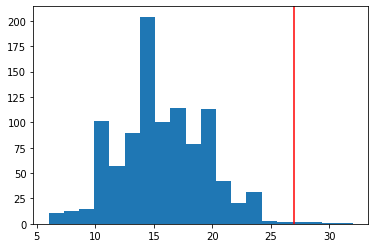

In [39]:
subseq = "ACT"
counts = []
for i in range(1000):
    seq = random.choices("ACTG",k=1000)
    seq = "".join(seq)
    count = PatternCount(seq,subseq)
    counts.append(count)

plt.hist(counts,bins=20)

x='AGAGGTTGATGCCACTGAAACTTATAAAGGCCACACTGAGCCGAGAACGTGCGCACTTTGGTAGCCCACTCCCACTAATGAACTAGATACTATACACTGCACACTTACAAACTCAGCACTAGTTACTACAACTCATGACTACCACTTCTACTGTCCTCTCAACCAGCTTGCGTGGCTCGGGTGTCAGGTTGTTAGATGTCCCTAATCTAAAGTGCGCAATTGTATCTCGCGGGCCCATACGGGGGTTGAGTTGATCGTATCGAATCGTTGGCTCGTCTCCGCATTCGACGAACGGACCTTGAGACATTGAGGCGAATATTGGTTTGCTCATCATCACATACTAACCCCAAAATGCTACCTCGTACGGGAAGGACGTCGCTGTGATGCCATAGTTATATCAGCAGTACTCTAGTAGATCAGTTAACGCCTTTATAGGACTCATTTGACGTTGCGATGGCCAGTGTGGCTCCGTCTGGGTCCGCACAAGGGACACACCTAAGTGGACCTGGAGCTGGTGTCCTGTGGACTGTCCTGTCGGAGCTAAAGGCAGCCTATGATTACCTTGCAATCTGAGCAATTTAAAAAACGACATCGGCCCCCGCGTAACATGTGCCGCGTCATATGCAGGCCGAAGCGCGACTAATTACAGCATAATTGCCACCGCCTGTTAAGTTCGCGGTTGTTCCATACGGTGTTTTAAGAGTAAAGGAAGGGGCGGGTAACGAATCGAGAATGGCCGAGACCTCGCTACTCTTACGTTCAAGAGAGGGTGTTGAGTTCCAGTCCGCCGTTCTGACGGCTACTGGTAGTCAAGCTCGGGTACCCTCAGCCGCTGTACGCGACTAGGCTTATTCTACCTAGGTGCTCCACCAGCGAATTGTTAGGACCGAGACCAATGTCTTCAGAGGTTAATGGTCATACTACCTTTATTAATTAGGCTAAGCACGCTAAGCCTACTCGTAGTGGGGTTCTTTTTTCAGCTGAGTATCGTGTTTCCTGTGCACCGGGAGTATGATCGTGCCTAGCGACCTGCTTGTAACCAGATTCC'
count = PatternCount(x,subseq)
print(count)

plt.axvline(count,c="red")
plt.show()

# Parte 2:  11:30 - 12:50


Nuestra hipotesis será que aquellos patrones que tienen funciones biologicas son los que aparecen más veces de lo esperado en la secuencia (más adelante veremos como calificar una frecuencia como mayor a lo esperado). 

En la clase anterior ya obtuvimos una función para computar cuantas veces un patrón está presente en una secuencia. Ahora, necesitamos una función para determinar la frecuencia de un patrón cualquiera, del cual no sabemos de antemano ni su composición ni el número de letras. Por ejemplo, 

* en la secuencia ACA**ACTAT**GCAT**ACTAT**CGGGA**ACTAT**CCT, el patrón de 5 letras **ACTAT** es el más frecuente, apareciendo 3 veces. 
* Por otro lado, en la secuencia CG**ATATA**TCC**ATA**G, el patrón de 3 letras **ATA** es el más frecuente, apareciendo 3 veces.

Un ejemplo más biologico, el siguiente es una secuencia de Vibrio cholerae


```
atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc
```

cuyos patrones más frecuentes son los siguientes:

<img src="https://raw.githubusercontent.com/mrivas/Bioinformatica/master/table.png" alt="Drawing" style="width: 700px;"/>

Para lograr esto, dado un ```Texto``` (así llamaremos también a las secuencias) en el cual queremos buscar un patron de largo ```k```, podemos crear una lista llamada ```Count``` de tamaño

```|Text| - k +1``` (es el número de sublistas de tamaño k en el Text), 

en cuya coordenada ```i``` guardamos el número de veces que se repite el patrón ubicado en ```Text[i:(i+k)]```.

Por ejemplo, dado ```Text="ACTGACTCCCACCCC"``` y ```k=3```, la lista ```Count``` es la siguiente.

```
Text: ACTGACTCCCACCCC
Count:2111211311133
```

A continuación una implementación de ésta función en Python

In [49]:
import numpy as np

def FrequentWords(Text, k):
    # 1. Crear la lista con el número de repeticiones
    Count = [0]*( len(Text)-k+1 )
    for i in range( len(Text) - k +1 ):
        Pattern = Text[ i:(i+k)]
        Count[i] = PatternCount(Text, Pattern) # PatternCount cuenta el número de veces 
                                               # que Pattern aparece en Text
    # 2. Presentar solo las secuencias con maś repeticiones
    maxCount = np.max(Count)
    FrequentPatterns = set()
    for i in range(len(Text) - k +1 ):
        if Count[i] == maxCount:
            FrequentPatterns.add( Text[i:(i+k)] )
            
    return( FrequentPatterns,maxCount ) #,Count

In [52]:
# Verifiquemos
Text="Hola, ¿como estas?. Hola, bien gracias. Y tú, ¿qué cuentas?"
k=6
FrequentWords(Text, k) # Debería imprimir los patrones de 3 letras más frecuentes. Puede haber más de uno


({'Hola, '}, 2)

In [56]:
Text="atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac\
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca\
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt\
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt\
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga\
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat\
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag\
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt\
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
k=9

FrequentWords(Text, k)

({'atgatcaag', 'ctcttgatc', 'cttgatcat', 'tcttgatca'}, 3)

### Ejercicio


Usando la función FrequentWords, verifica que 

1. Dado Text="ACAACTATGCATACTATCGGGAACTATCCT", el patrón de 5 letrás más común es "ACTAT"
2. Dado Text="CGATATATCCATAG", el patrón de 3 letras más común es "ATA"


# Optimización del código


Ya conseguimos nuestro objetivo de crear una herramienta para encontrar los patrones más comunes. Ésta funciona bien, pero no es muy eficiente. En ejemplos reales, en donde las secuencias genéticas tienen millones de bases, nuestra función es muy lenta. Utliza un ciclo for para recorrer la secuencia completa, pero por cada iteración del ciclo for llama a la función PatternCount, la que a su vez recorre nuevamente la secuencia completa, de principio a fin. 

Una manera más eficiente de hacer los calculos es almacenara el número de veces que ser recorre la secuencia no en una lista, sino en un diccionario. En python un diccionario se define de la siguiente manera:

```python
    x={} # a nuestro diccionario lo llamaremos x
    x["secuencia1"]=1
    x["secuencia2"]=3
    x["secuencia1"] = x["secuencia1"] +1
```



Este es el seudo código para implementar esta mejora

```python
    FrequencyDicionary(Text, k)
        freqMap ← empty map
        n ← |Text|
        for i ← 0 to n − k
            Pattern ← Text(i, k)
            if freqMap[Pattern] doesn't exist
                freqMap[Pattern]← 1
            else
               freqMap[pattern] ←freqMap[pattern]+1 
        return freqMap
    
    BetterFrequentWords(Text, k)
        FrequentPatterns ← an array of strings of length 0
        freqMap ← FrequencyDictionary(Text, k)
        max ← MaxMap(freqMap)
        for all strings Pattern in freqMap
            if freqMap[pattern] = max
                append Pattern to FrequentPatterns
        return frequentPatterns    
```    

# Ejercicio

Implementa este nuevo algoritmo en Python

```python

Text="ACTGACTCCCACCCC"
k=3



freqDic={}
freqDic["CGA"] = 2 # numero de veces que aparece en Text
freqDic["GAT"] = 1 # numero de veces que aparece en Text
....
freqDic["ATA"] = 3

len(freqDic) < len(Count) # ESTA ES LA PARTE IMPORTANTE. AL TENER MENOS ELEMENTOS freqDic,                           # HAY MENOS ITERACIONES QUE EFECTUAR LUEGO => NUESTRO ALGORITMO SERÍA MÁS EFICIENTE
```    